# CS 6220 Assignment 8B

## Revisit assignment 8A solution

In [1]:
import pandas as pd

# Haberman's Survival Data Set, which is a binary dataset (survival status can be either 1 or 2)
# Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

# Attribute Information:
# 1. Age of patient at time of operation (numerical)
# 2. Patient's year of operation (year - 1900, numerical)
# 3. Number of positive axillary nodes detected (numerical)
# 4. Survival status (class attribute)
# -- 1 = the patient survived 5 years or longer
# -- 2 = the patient died within 5 years
data = pd.read_csv(fileURL, names=['Age', 'Year of operation', 'Number of positive axillary nodes', 'Survival status'], 
                   header=None)
data.head()

,Age,Year of operation,Number of positive axillary nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
# Compute and display summary statistics for each feature available in the dataset
summary = data.describe(include='all')
summary

,Age,Year of operation,Number of positive axillary nodes,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


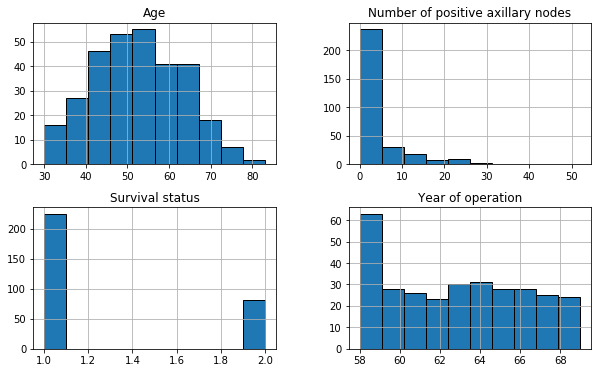

In [3]:
# Create a histogram for each feature in the dataset
histogram = data.hist(edgecolor='k', figsize=(10,6))

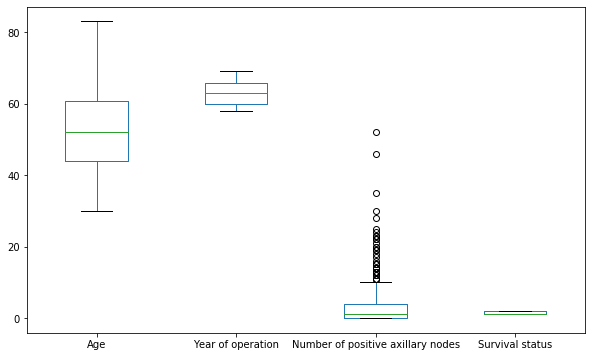

In [4]:
# Create a boxplot for each feature in the dataset
boxplot = data.boxplot(grid=False, return_type='axes', figsize=(10,6))

In [5]:
survival = data.groupby('Survival status').size().sort_values(ascending=False)
survival

Survival status
1    225
2     81
dtype: int64

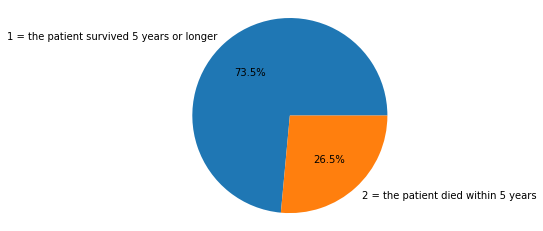

In [6]:
import matplotlib.pyplot as plt

# Create a pie plot for survival status feature in the dataset
labels = '1 = the patient survived 5 years or longer', '2 = the patient died within 5 years'
sizes = [survival.values[0], survival.values[1]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Model

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets: 30% test set, 70% train set
X = data[['Age', 'Year of operation', 'Number of positive axillary nodes']]
y = data['Survival status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
from sklearn import tree

# Train a supervised learning model that can be used to generate predicions for data
# Create classifier using default settings for DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,0]

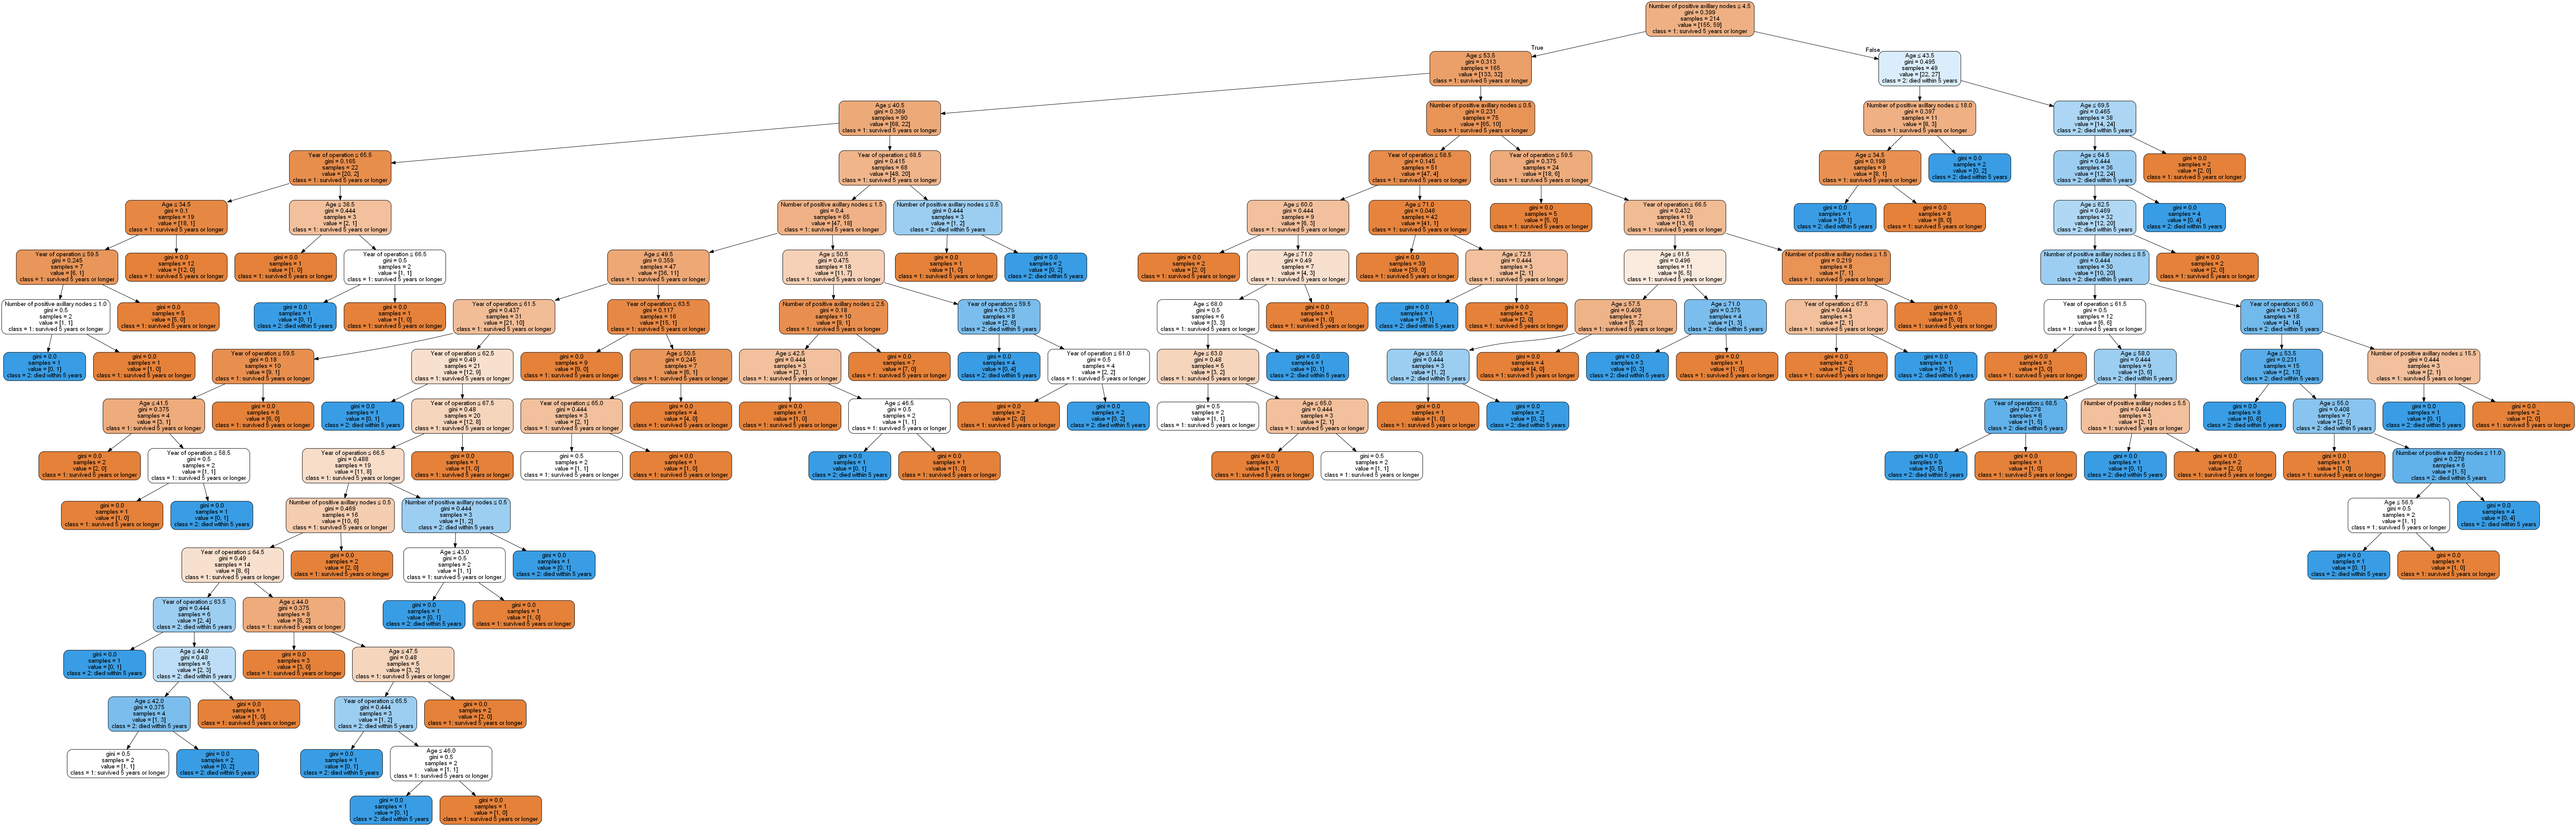

In [9]:
from IPython.display import Image
import graphviz
import pydotplus

# Generate the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['Age', 'Year of operation', 
            'Number of positive axillary nodes'], class_names=['1: survived 5 years or longer', '2: died within 5 years'], 
            filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
Image(graph.create_png())

## Model improvement

The model can be improved by tuning the parameters of the decision tree classifier. For example, in the previous model (model 1), the default criterion="gini", and max_depth=None for decision tree classifier. Next, in the improved model (model 2), by setting criterion="entropy", and max_depth=3 for decision tree classifier, we achieve better model performance, as shown in the detailed evaluation report below.

In [10]:
# Train a supervised learning model that can be used to generate predicions for data
# Create classifier using criterion="entropy", and max_depth=3 for DecisionTreeClassifier
clf2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf2 = clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
y_pred_proba2 = clf2.predict_proba(X_test)
y_pred_proba2 = y_pred_proba2[:,0]

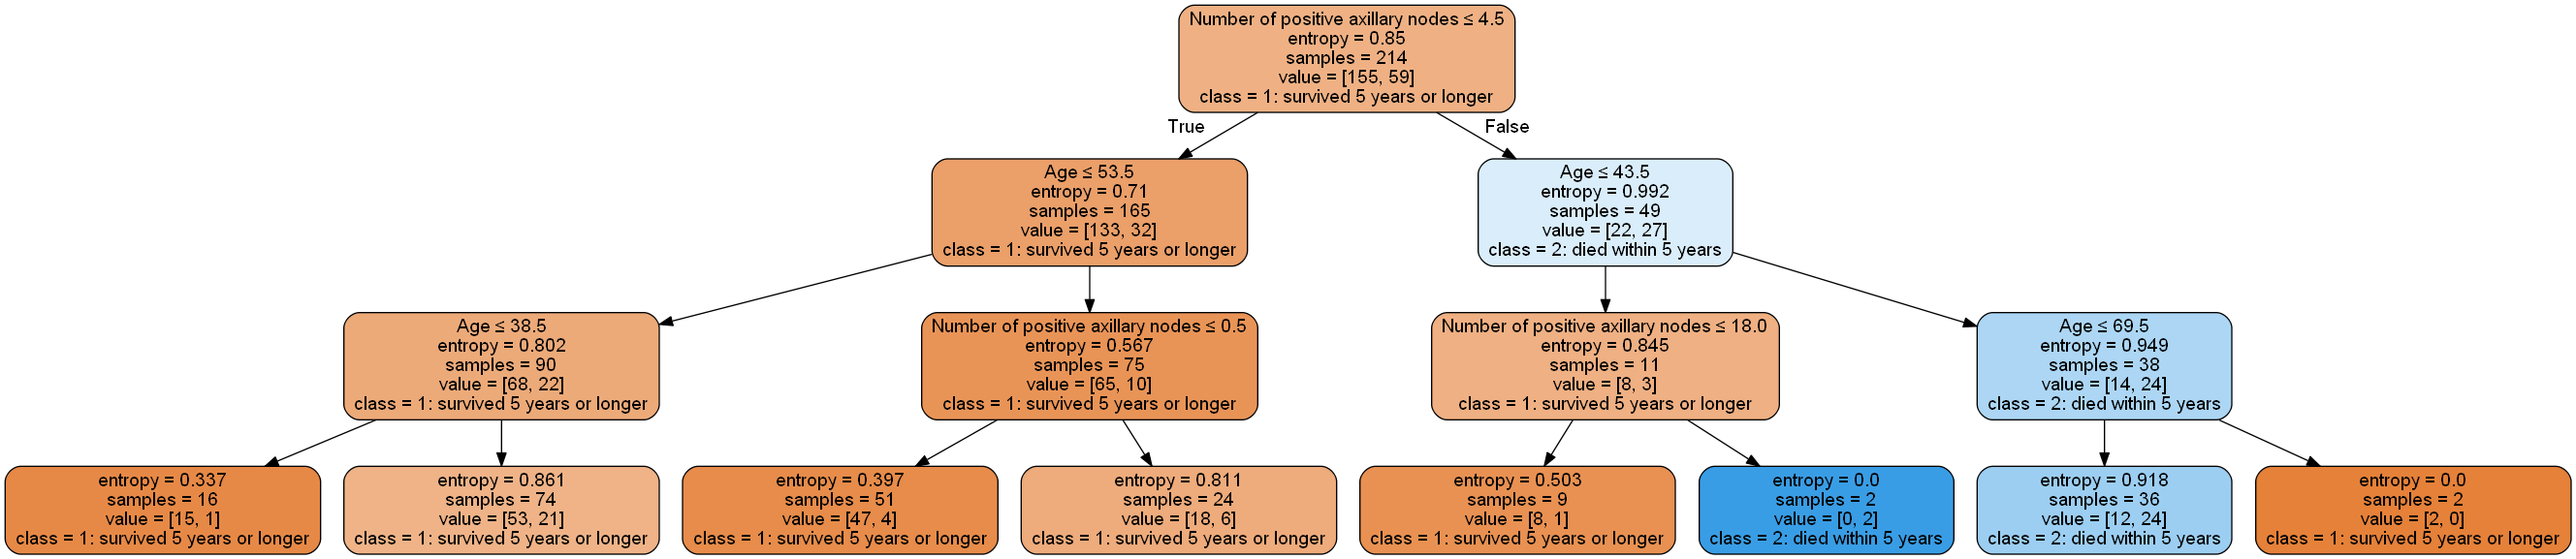

In [11]:
# Generate the decision tree
dot_data = tree.export_graphviz(clf2, out_file=None, feature_names=['Age', 'Year of operation', 
            'Number of positive axillary nodes'], class_names=['1: survived 5 years or longer', '2: died within 5 years'], 
            filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
Image(graph.create_png())

For this database, positive indicates the patient survived 5 years or longer, negative indicates the patient died within 5 years.
<br>True Positive (TP): The correctly predicted positive values, the actual observation is positive and the value of predicted class is also positive.
<br>True Negative (TN): The correctly predicted negative values, the actual observation is negative and the value of predicted class is also negative.
<br>False Positive (FP): The actual observation is negative but the value of predicted class is positive.
<br>False Negative (FN): The actual observation is positive but the value of predicted class is negative.

## 1. The accuracy of your model on the test data

In [12]:
from sklearn import metrics

# Display model accuracy
print("Model 1 accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Model 2 accuracy:", metrics.accuracy_score(y_test, y_pred2))

Model 1 accuracy: 0.6413043478260869
Model 2 accuracy: 0.7608695652173914


Accuracy = (TP+TN) / (TP+TN+FP+FN). Accuracy is the ratio of correctly predicted observations to the total observations. For model 1, the accuracy is about 0.64. For model 2, the accuracy is improved to be about 0.76, which is relatively good, indicating model 2 is a better model. But as a metric, accuracy has its own problems because it assumes equal costs for both kinds of errors (FP and FN). Accuracy is a great measure only for symmetric datasets where values of false positive and false negatives are about the same. So, we need to use other measures to fully evaluate the performance of model.

## 2. The precision and recall values

In [13]:
# Display model precision
print("Model 1 precision:", metrics.precision_score(y_test, y_pred))
print("Model 2 precision:", metrics.precision_score(y_test, y_pred2))

# Display model recall
print("Model 1 recall:", metrics.recall_score(y_test, y_pred))
print("Model 2 recall:", metrics.recall_score(y_test, y_pred2))

Model 1 precision: 0.8135593220338984
Model 2 precision: 0.8529411764705882
Model 1 recall: 0.6857142857142857
Model 2 recall: 0.8285714285714286


Precision = TP / (TP+FP). Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. For model 1, the precision is about 0.81. For model 2, the precision is improved to be about 0.85, which is quite good, indicating model 2 is a better model. High precision indicates there is low false positive rate.

Recall = TP / (TP+FN). Recall is the ratio of correctly predicted positive observations to the total actual positive observations. For model 1, the recall is about 0.69. For model 2, the recall is improved to be about 0.83, which is quite good, indicating model 2 is a better model.

## 3. A classification report

In [14]:
# Generate classification report
target_names = ['1: survived 5 years or longer', '2: died within 5 years']
print("Model 1 classification report:")
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

print("Model 2 classification report:")
print(metrics.classification_report(y_test, y_pred2, target_names=target_names))

Model 1 classification report:
                               precision    recall  f1-score   support

1: survived 5 years or longer       0.81      0.69      0.74        70
       2: died within 5 years       0.33      0.50      0.40        22

                     accuracy                           0.64        92
                    macro avg       0.57      0.59      0.57        92
                 weighted avg       0.70      0.64      0.66        92

Model 2 classification report:
                               precision    recall  f1-score   support

1: survived 5 years or longer       0.85      0.83      0.84        70
       2: died within 5 years       0.50      0.55      0.52        22

                     accuracy                           0.76        92
                    macro avg       0.68      0.69      0.68        92
                 weighted avg       0.77      0.76      0.76        92



Classification report shows precision, recall, f1-score, and support for each class. F1-score = 2 * recall * precision / (recall + precision). F1-score is the weighted average of precision and recall. F1-score takes both false positives and false negatives into account and punishes the extreme values more. F1-score is usually more useful than accuracy, especially for an uneven class distribution. Support is the number of samples of the true response in that class. Overall, these evaluation metrics show that model 2 performs better than model 1.

## 4. The confusion matrix for this experiment

In [15]:
print("Model 1 confusion matrix:")
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), 
             columns=['Predicted: survived 5 years or longer', 'Predicted: died within 5 years'], 
             index=['Actual: survived 5 years or longer', 'Actual: died within 5 years'])

Model 1 confusion matrix:


,Predicted: survived 5 years or longer,Predicted: died within 5 years
Actual: survived 5 years or longer,48,22
Actual: died within 5 years,11,11


In [16]:
print("Model 2 confusion matrix:")
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred2), 
             columns=['Predicted: survived 5 years or longer', 'Predicted: died within 5 years'], 
             index=['Actual: survived 5 years or longer', 'Actual: died within 5 years'])

Model 2 confusion matrix:


,Predicted: survived 5 years or longer,Predicted: died within 5 years
Actual: survived 5 years or longer,58,12
Actual: died within 5 years,10,12


For model 1, TP: 48, FN: 22, FP: 11, TN: 11. Out of 92 test instances, TP + TN = 48 + 11 = 59 instances are correctly predicted. There are 22 false negative and 11 false positive instances which are incorrectly predicted, as the actual class contradicts with the predicted class. For model 2, TP: 58, FN: 12, FP: 10, TN: 12. Out of 92 test instances, TP + TN = 58 + 12 = 70 instances are correctly predicted. There are 12 false negative and 10 false positive instances which are incorrectly predicted, as the actual class contradicts with the predicted class. Therefore, we observe that model 2 perform better than model 1 since model 2 results in more correct predictions than model 1 and model improvement is quite significant.

## 5. An ROC curve

Model 1 ROC AUC score: 0.5928571428571427
Model 2 ROC AUC score: 0.687012987012987


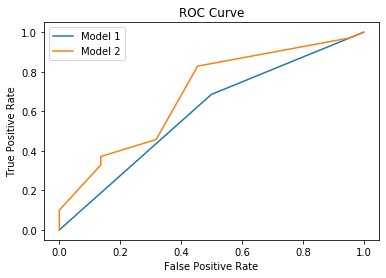

In [17]:
# Model 1 ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
plt.plot(fpr, tpr, label='Model 1')

# Model 2 ROC curve
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_pred_proba2, pos_label=1)
plt.plot(fpr2, tpr2, label='Model 2')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Display model ROC AUC score
print("Model 1 ROC AUC score:", metrics.roc_auc_score(y_test, y_pred))
print("Model 2 ROC AUC score:", metrics.roc_auc_score(y_test, y_pred2))

ROC curve is typically used in binary classification to study the output of a classifier. It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a test. The slope of ROC curve is important because it is ideal to maximize the true positive rate while minimizing the false positive rate. It shows the tradeoff between sensitivity and specificity. The top left corner of the plot is the ideal point, where has a false positive rate of zero, and a true positive rate of one. Accuracy is measured by the area under the ROC curve. A larger area under the curve, closer to 1 will indicate better test accuracy. By comparison, model 2 has a larger area under the ROC curve, indicating it is a better model than model 1. For model 1, the ROC AUC score is about 0.59. For model 2, the ROC AUC score is improved to be about 0.69, indicating model 2 is a better model. Judged by the ROC AUC score, there is still room for further model improvement.

## 6. A Precision/Recall curve

Model 1 average precison score: 0.796999684177282
Model 2 average precison score: 0.8586462486601312


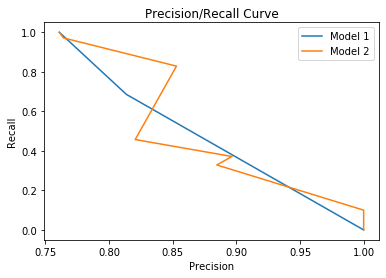

In [18]:
# Model 1 Precision/Recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba, pos_label=1)
plt.plot(precision, recall, label='Model 1')

# Model 2 Precision/Recall curve
precision2, recall2, thresholds2 = metrics.precision_recall_curve(y_test, y_pred_proba2, pos_label=1)
plt.plot(precision2, recall2, label='Model 2')

plt.legend()
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision/Recall Curve')

# Display model average precison score
print("Model 1 average precison score:", metrics.average_precision_score(y_test, y_pred_proba))
print("Model 2 average precison score:", metrics.average_precision_score(y_test, y_pred_proba2))

Precision/recall curve computes precision-recall pairs for different probability thresholds. Precision/recall curve summarizes the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds. We can observe a trade-off between precision and recall in our model. Usually, ROC curve is appropriate when the observations are balanced between each class, whereas precision/recall curve is appropriate for imbalanced datasets. For model 1, the average precision score is about 0.80. For model 2, the average precision score is improved to be about 0.86, which is quite good, indicating model 2 is a better model.

Overall, the evaluation report shows that our models perform relatively well. The improved model, model 2 performs better than model 1 judged by all the metrics discussed above.